In [14]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Question 1:

## Part a

In [15]:
# code here
# first define a function for calculating histogram
# you are free to use libraries
def calc_hist(image):
    '''
    you are free to use libraries
    calculate image histogram
    input(s):
      image (ndarray): input image
    output(s):
      hist (ndarray): computed input image histogram
    '''
    #######################
    hist = np.zeros((256), np.int_)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            hist[image[i][j]] += 1
    #######################
    
    return(hist)

In [16]:
# code here
# define a function (stretch) for stretching(input:image , output: stretched image)

def stretch_hist(image):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
  output(s):
    output_image (ndarray): enhanced image with histogram stretching
  '''
  output_image = image.copy()
  histogram = calc_hist(image)

  #######################
  for start in range(len(histogram)):
    if histogram[start] != 0:
        break

  for end in range(len(histogram)-1, 0, -1):
    if histogram[end] != 0:
        break

  output_image = (((output_image - start) / (end - start)) * 255).astype(np.uint8)
  #######################
  
  return output_image


In [17]:
# code here
# define a function (Clip) for Clipping(input:image , output: Clipped image)

def clip_hist(image, min_value, max_value):
  '''
  don't use libraries
  input(s):
    image (ndarray): input image
    min_value : min value of the histogram which you wanna clip.
    max_value : max value of the histogram which you wanna clip.
  output(s):
    output_image (ndarray): enhanced image with histogram clipping
  '''
  output_image = image.copy()

  #######################
  histogram = calc_hist(output_image)

  n = output_image.shape[0] * output_image.shape[1]
  min_value = min_value / 100
  max_value = (100-max_value) / 100

  counter = 0
  for start in range(255):
      counter += histogram[start]
      
      if (counter >= n*min_value):
          break

  counter = 0
  for end in range(255, 0, -1):
      counter += histogram[end]
      
      if (counter >= n*max_value):
          break

  output_image = ((((output_image - start) / (end - start)) * 255).clip(0, 255)).astype(np.uint8)
  #######################

  return output_image


## Part b

In [18]:
# define "image1" here

#######################
image1 = cv2.imread('image1.jpg', 0)
histogram = calc_hist(image1)
#######################

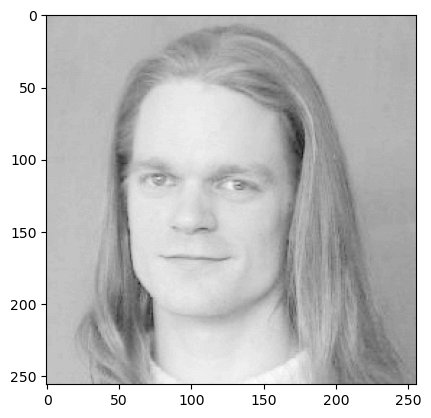

In [19]:
plt.imshow(image1, cmap='gray')
plt.show()

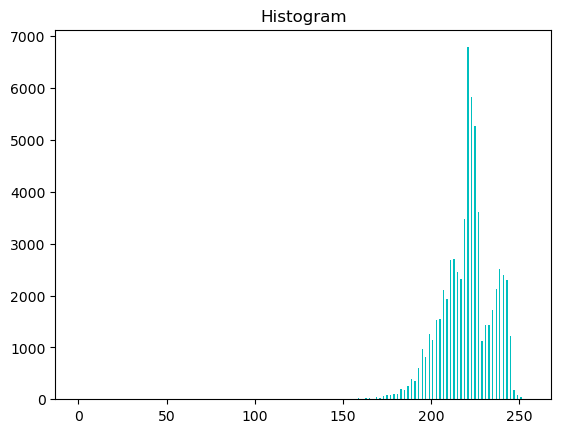

In [20]:
plt.figure()
plt.bar(np.arange(256), histogram, color='c')
plt.title("Histogram")
plt.show()

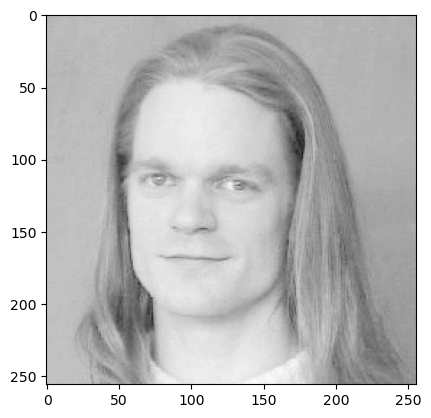

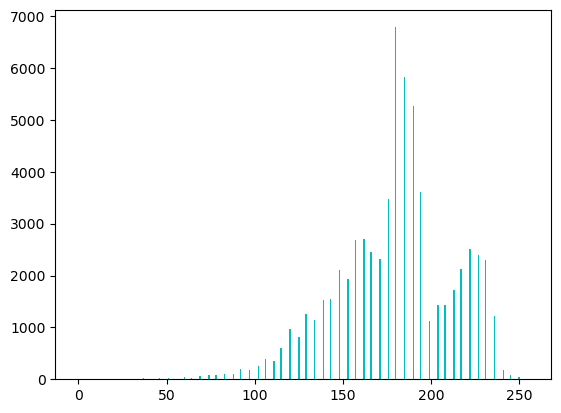

In [21]:
# use clip_hist and stretch_hist function to improve quality of the image and show it

#######################
stretched_img = stretch_hist(image1)
plt.imshow(stretched_img, cmap='gray')
plt.show()

stretched_hist = calc_hist(stretched_img)
plt.figure()
plt.bar(np.arange(256), stretched_hist, color='c')
plt.show()
#######################

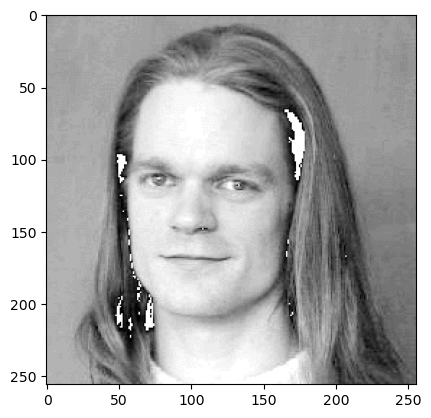

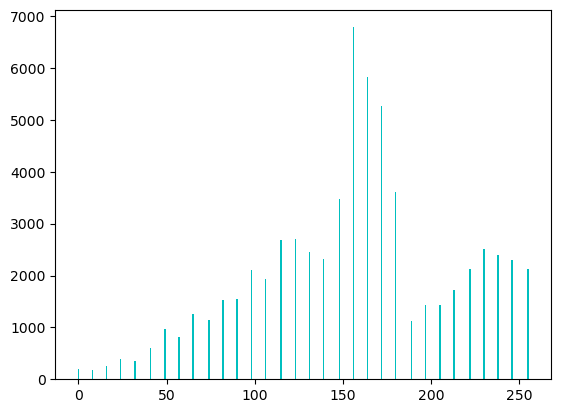

In [23]:
clipped_img = clip_hist(image1, 1, 99)
plt.imshow(clipped_img, cmap='gray')

clipped_hist = calc_hist(clipped_img)
plt.figure()
plt.bar(np.arange(256), clipped_hist, color='c')
plt.show()